# Regression

### Preliminaries

- Goal 
  - Introduction to Bayesian (Linear) Regression
- Materials        
  - Mandatory
    - These lecture notes
  - Optional
    - Bishop pp. 152-158 
    - In this and forthcoming lectures, we will make use of some elementary matrix calculus. The most important formulas are summarized at the bottom of this notebook in an [OPTIONAL SLIDE on matrix calculus](#matrix-calculus). For derivations, see Bishop Appendix C. 
    

### Regression - Illustration


<p style="text-align:center;"><img src="./figures/fig-bishop12.png" width="400px"></p>

Given a set of (noisy) data measurements, find the 'best' relation between an input variable $x \in \mathbb{R}^M$ and input-dependent outcomes $y \in \mathbb{R}$.


### Regression vs Density Estimation


- Observe $N$ IID data **pairs** $D=\{(x_1,y_1),\dotsc,(x_N,y_N)\}$ with $x_n \in \mathbb{R}^M$ and $y_n \in \mathbb{R}$.

- Assume that we are interested in (a model for) the responses $y_n$ for **given inputs** $x_n$?, I.o.w. we are interested in building a model for the conditional distribution $p(y|x)$.

- Note that, since $p(x,y)=p(y|x)\, p(x)$, building a model $p(y|x)$ is similar to density estimation with the assumption that $x$ is drawn from a uniform distribution.

### Bayesian Linear Regression

- Next, we discuss (1) model specification, (2) Inference and (3) a prediction application for a Bayesian linear regression problem. 

#####  1. Model Specification


- In a traditional _regression_ model, we try to 'explain the data' by a purely deterministic function $f(x_n,w)$, plus a purely random term $\epsilon_n$ for 'unexplained noise':
$$
    y_n  = f(x_n,w) + \epsilon_n
$$   

-  In a _linear regression_ model, i.e., linear w.r.t. the parameters $w$, we assume that 
$$f(x_n,w)= \sum_{j=0}^{M-1} w_j \phi_j(x_n) = w^T \phi(x_n)$$
where $\phi_j(x)$ are called basis functions.
  - For notational simplicity, from now on we will assume $f(x_n,w) = w^T x_n$, with $x_n \in \mathbb{R}^M$.

-  In _ordinary linear regression_ , the noise process $\epsilon_n$ is zero-mean Gaussian with constant variance, i.e.
$$
\epsilon_n \sim \mathcal{N}(0,\beta^{-1}) \,.
$$

- Hence, given a data set  $D=\{(x_1,y_1),\dotsc,(x_N,y_N)\}$, the likelihood for an ordinary linear regression model is 

$$\begin{align*}
p(y\,|\,\mathbf{X},w,\beta) &= \mathcal{N}(y\,|\,\mathbf{X} w,\beta^{-1} \mathbf{I}) \\
  &= \prod_n \mathcal{N}(y_n\,|\,w^T x_n,\beta^{-1}) \tag{B-3.10}
\end{align*}$$

where $w = \left(\begin{matrix} w_1 \\ w_2 \\ \vdots \\ w_{M} \end{matrix} \right)$, the $(N\times M)$-dim matrix $\mathbf{X}  = \left(\begin{matrix}x_1^T \\ x_2^T \\ \vdots \\ x_N^T \end{matrix} \right) = \left(\begin{matrix}x_{11},x_{12},\dots,x_{1M}\\ x_{21},x_{22},\dots,x_{2M} \\ \vdots \\ x_{N1},x_{N2},\dots,x_{NM} \end{matrix} \right) $  and $y = \left(\begin{matrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{matrix} \right)$.


- For full Bayesian learning we should also choose a prior $p(w)$:

$$\begin{equation}
p(w\,|\,\alpha) = \mathcal{N}(w\,|\,0,\alpha^{-1}\mathbf{I}) \tag{B-3.52}
\end{equation}$$

- For simplicity, we will assume that $\alpha$ and $\beta$ are fixed and known. 


##### 2. Inference

- We'll do Bayesian inference for the parameters $w$. 

$$\begin{align*}
p(w|D) &\propto p(D|w)\cdot p(w) \\
   &= \mathcal{N}(y\,|\,\mathbf{X} w,\beta^{-1} \mathbf{I}) \cdot \mathcal{N}(w\,|\,0,\alpha^{-1}\mathbf{I}) \\
   &\propto \exp \big( -\frac{\beta}{2} \big( {y - \mathbf{X}w } \big)^T \big( {y - \mathbf{X}w } \big)  - \frac{\alpha}{2}w^T w \big) \qquad \text{(B-3.55)} \\
   &= \exp\big( -\frac{1}{2} w^T\big(\underbrace{\beta \mathbf{X}^T\mathbf{X} + \alpha \mathbf{I}}_{\Lambda_N}\big)w + \big(\underbrace{\beta \mathbf{X}^Ty}_{\eta_N}\big)^T w - \frac{\beta}{2}y^T y \big) \\
     &\propto \mathcal{N}_c\left(w\,|\,\eta_N,\Lambda_N \right)
\end{align*}$$

with natural parameters (see the [natural parameterization of Gaussian](https://nbviewer.jupyter.org/github/bertdv/BMLIP/blob/master/lessons/notebooks/The-Gaussian-Distribution.ipynb#natural-parameterization)):

$$\begin{align*}
\eta_N &= \beta\mathbf{X}^Ty \\
\Lambda_N &= \beta \mathbf{X}^T\mathbf{X} + \alpha \mathbf{I}
\end{align*}$$

- Or equivalently (in the moment parameterization of the Gaussian):
$$\begin{align*}
p(w|D) &= \mathcal{N}\left(w\,|\,m_N,S_N \right) \qquad &&\text{(B-3.49)} \\
m_N &= \beta S_N \mathbf{X}^T y  \qquad &&\text{(B-3.53)}\\
S_N &= \left(\alpha \mathbf{I} + \beta \mathbf{X}^T \mathbf{X}\right)^{-1} \qquad &&\text{(B-3.54)}
\end{align*}$$

- Note that B-3.53 and B-3.54 combine to
$$
m_N = \left(\frac{\alpha}{\beta}\mathbf{I} + \mathbf{X}^T \mathbf{X} \right)^{-1} \mathbf{X}^T y\,.
$$


 - (Bishop Fig.3.7) Illustration of sequential Bayesian learning for a simple linear model of the form $y(x, w) =
w_0 + w_1 x$. (Bishop Fig.3.7, detailed description at Bishop, pg.154.)

<p style="text-align:center;"><img src="./figures/Figure3.7.png" width="500px"> </p>

##### 3. Application: <a id="predictive-distribution">Predictive Distribution</a>

- Assume we are interested in the distribution $p(y_\bullet \,|\, x_\bullet, D)$ for a new input $x_\bullet$. This can be worked out as (exercise B-3.10)

$$\begin{align*}
p(y_\bullet \,|\, x_\bullet, D) &= \int p(y_\bullet \,|\, x_\bullet, w) p(w\,|\,D)\,\mathrm{d}w \\
&= \int \mathcal{N}(y_\bullet \,|\, w^T x_\bullet, \beta^{-1}) \mathcal{N}(w\,|\,m_N,S_N)\,\mathrm{d}w \\
&= \int \mathcal{N}(y_\bullet \,|\, z, \beta^{-1}) \underbrace{\mathcal{N}(z\,|\,x_\bullet^T m_N,x_\bullet^T S_N x_\bullet)\,\mathrm{d}z}_{=\mathcal{N}(w\,|\,m_N,S_N)\,\mathrm{d}w} \quad \text{(sub. }z=x_\bullet^T w \text{)} \\
&= \int \underbrace{\underbrace{\mathcal{N}(z \,|\, y_\bullet, \beta^{-1})}_{\text{switch }z \text{ and }y_\bullet} \mathcal{N}(z\,|\,x_\bullet^T m_N,x_\bullet^T S_N x_\bullet)}_{\text{Use Gaussian product formula SRG-6}}\,\mathrm{d}z  \\
&= \int \mathcal{N}\left(y_\bullet\,|\, m_N^T x_\bullet, \sigma_N^2(x_\bullet) \right) \underbrace{\mathcal{N}\left(z\,|\, \cdot, \cdot\right)}_{\text{integrate this out}} \mathrm{d}z\\
&= \mathcal{N}\left(y_\bullet\,|\, m_N^T x_\bullet, \sigma_N^2(x_\bullet) \right)
\end{align*}$$
with
$$\begin{align*}
\sigma_N^2(x_\bullet) = \beta^{-1} + x^T_\bullet S_N x_\bullet \tag{B-3.59}
\end{align*}$$

- So, the uncertainty $\sigma_N^2(x_\bullet)$ about the output $y_\bullet$ contains both uncertainty about the process ($\beta^{-1}$) and about the model parameters ($x^T_\bullet S_N x_\bullet$).  

- (See the [OPTIONAL SLIDE](#change-of-variable-derivation) below for the step in this derivation where $\mathcal{N}(w\,|\,m_N,S_N)\,\mathrm{d}w$ gets replaced $\mathcal{N}(z\,|\,x_\bullet^T m_N,x_\bullet^T S_N x_\bullet)\,\mathrm{d}z$.)

### Example Predictive Distribution

- As an example, let's do Bayesian Linear Regression for a synthetic sinusoidal data set and a model with 9 Gaussian basis functions 
$$\begin{align*}
y_n &=\sum_{m=1}^9 w_m \phi_m(x_n) + \epsilon_n \\
\phi_m(x_n) &= \exp\left( \frac{x_n-\mu_m}{\sigma^2}\right) \\
\epsilon_n &\sim \mathcal{N}(0,\beta^{-1})
\end{align*}$$

<p style="text-align:center;"><img src="./figures/Figure3.1b.png" width="250px"></p>

- The predictive distributions for $y$ are shown in the following plots (Bishop, Fig.3.8)
<p style="text-align:center;"><img src="./figures/Figure3.8.png" width="500px"> </p>


- And some plots of draws of posteriors for the functions $w^T \phi(x)$ (Bishop, Fig.3.9) 

<p style="text-align:center;"><img src="./figures/Figure3.9.png" width="500px"></p> 

###  Maximum Likelihood Estimation for Linear Regression Model

- Recall the posterior mean for the weight vector
$$
m_N = \left(\frac{\alpha}{\beta}\mathbf{I} + \mathbf{X}^T \mathbf{X} \right)^{-1} \mathbf{X}^T y
$$
where $\alpha$ is the prior precision for the weights.

- The Maximum Likelihood solution for $w$ is obtained by letting $\alpha \rightarrow 0$, which leads to 

$$\begin{equation*}
\hat w_{\text{ML}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T y
\end{equation*}$$

-  The matrix $\mathbf{X}^\dagger \equiv  (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T$ is also known as the **Moore-Penrose pseudo-inverse** (which is sort-of-an-inverse for non-square matrices).

-  Note that if we have fewer training samples than input dimensions, i.e., if $N<M$, then $\mathbf{X}^T \mathbf{X}$  will not be invertible and maximum likelihood blows up. The Bayesian solution does not suffer from this problem.

###  Least-Squares Regression

-  (You may say that) we don't need to work with probabilistic models. E.g., there's also the deterministic **least-squares** solution: minimize sum of squared errors,

$$\begin{align*} \hat w_{\text{LS}} &= \arg\min_{w} \sum_n {\left( {y_n  - w ^T x_n } \right)} ^2 
  = \arg\min_{w} \left( {y - \mathbf{X}w } \right)^T \left( {y - \mathbf{X} w } \right)
\end{align*}$$

-  Setting the <a id="regression-gradient">gradient</a> 
$ \frac{\partial \left( {y - \mathbf{X}w } \right)^T \left( {y - \mathbf{X}w } \right)}{\partial w} = -2 \mathbf{X}^T \left(y - \mathbf{X} w  \right)
$ to zero yields the so-called  **normal equations** 
$\mathbf{X}^T\mathbf{X} \hat w_{\text{LS}} = \mathbf{X}^T y$  and consequently

$$
\hat w_{\text{LS}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T y
$$

which is the same answer as we got for the maximum likelihood weights $\hat w_{\text{ML}}$.

- $\Rightarrow$ Least-squares regression ($\hat w_{\text{LS}}$) corresponds to the (probabilistic) maximum likelihood solution ($\hat w_{\text{ML}}$) if the probabilistic model includes the following assumptions:
  1. The observations are independently and identically distributed (**IID**) (this determines how errors are combined), and
  1. The noise signal $\epsilon_n \sim \mathcal{N}(0,\,\beta^{-1})$ is **Gaussian** distributed (determines the error metric)      
  

- If you use the Least-Squares method, you cannot see (nor modify) these assumptions. The probabilistic method forces you to state all assumptions explicitly! 

###  Not Identically Distributed Data

-  Let's do an example regarding changing our assumptions. What if we assume that the variance of the measurement error varies with the sampling index,  $\epsilon_n \sim \mathcal{N}(0,\beta_n^{-1})$?

- The likelihood is now (using $\Lambda \triangleq \mathrm{diag}(\beta_n)$ )
$$
p(y\,|\,\mathbf{X},w,\Lambda) = \mathcal{N}(y\,|\,\mathbf{X} w,\Lambda^{-1} ) \,.
$$

- Combining this likelihood with the prior $p(w) = \mathcal{N}(w\,|\,0,\alpha^{-1}\mathbf{I})$ leads to a posterior

$$\begin{align*}
p(w|D) &\propto p(D|w)\cdot p(w) \\
   &= \mathcal{N}(y\,|\,\mathbf{X} w,\Lambda^{-1} \mathbf{I}) \cdot \mathcal{N}(w\,|\,0,\alpha^{-1}\mathbf{I}) \\
   &\propto \exp \left\{ \frac{1}{2} \left( {y - \mathbf{X}w } \right)^T \Lambda \left( {y - \mathbf{X}w } \right)  + \frac{\alpha}{2}w^T w \right\} \\
   &\propto \mathcal{N}\left(w\,|\,m_N,S_N \right) 
\end{align*}$$
with
$$\begin{align*}
m_N &=  S_N \mathbf{X}^T \Lambda y  \\
S_N &= \left(\alpha \mathbf{I} +  \mathbf{X}^T \Lambda \mathbf{X}\right)^{-1} 
\end{align*}$$

- And maximum likelihood solution 
$$
\hat{w}_{\text{ML}} = \left. m_N\right|_{\alpha \rightarrow 0} = \left(\mathbf{X}^T \Lambda \mathbf{X}\right)^{-1} \mathbf{X}^T \Lambda y
$$

-  This maximum likelihood solution is also called the **Weighted Least Squares** (WLS) solution. (Note that we just stumbled upon it, the crucial aspect is appropriate model specification!)

-  Note also that the dimension of $\Lambda$ grows with the number of data points. In general, models for which the number of parameters grow as the number of observations increase are called **non-parametric models**.

### Code Example: Least Squares vs Weighted Least Squares

- We'll compare the Least Squares and Weighted Least Squares solutions for a simple linear regression model with input-dependent noise:

$$\begin{align*}
x &\sim \text{Unif}[0,1]\\
y|x &\sim \mathcal{N}(f(x), v(x))\\
f(x) &= 5x - 2\\
v(x) &= 10e^{2x^2}-9.5\\
\mathcal{D} &= \{(x_1,y_1),\ldots,(x_N,y_N)\}
\end{align*}$$

In [ ]:
using Pkg; Pkg.activate("../."); Pkg.instantiate();
using IJulia; try IJulia.clear_output(); catch _ end

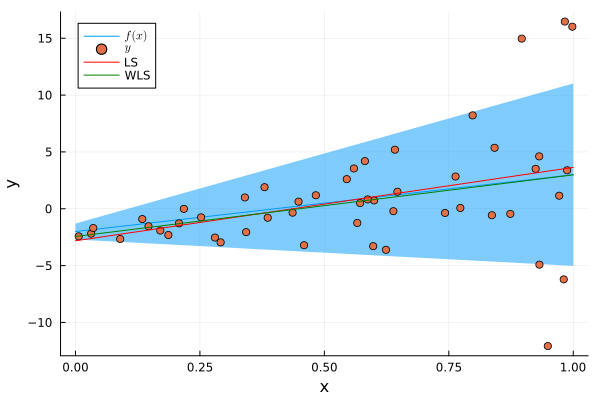

In [2]:
using Plots, Distributions, LaTeXStrings, LinearAlgebra

# Model specification: y|x ~ 𝒩(f(x), v(x))
f(x) = 5*x .- 2 
v(x) = 10*exp.(2*x.^2) .- 9.5 # input dependent noise variance
x_test = [0.0, 1.0]
plot(x_test, f(x_test), ribbon=sqrt.(v(x_test)), label=L"f(x)") # plot f(x)

# Generate N samples (x,y), where x ~ Unif[0,1]
N = 50
x = rand(N)
y = f(x) + sqrt.(v(x)) .* randn(N)
scatter!(x, y, xlabel="x", ylabel="y", label=L"y") # Plot samples

# Add constant to input so we can estimate both the offset and the slope
_x = [x ones(N)]
_x_test = hcat(x_test, ones(2))

# LS regression
w_ls = pinv(_x) * y
plot!(x_test, _x_test*w_ls, color=:red, label="LS") # plot LS solution

# Weighted LS regression
W = Diagonal(1 ./ v(x)) # weight matrix
w_wls = inv(_x'*W*_x) * _x' * W * y
plot!(x_test, _x_test*w_wls, color=:green, label="WLS") # plot WLS solution


### Some Final Remarks


- Aside from the above example, we also recommend that you read through the [RxInfer Bayesian Linear Regression example](https://biaslab.github.io/RxInfer.jl/stable/examples/basic_examples/Bayesian%20Linear%20Regression%20Tutorial/). 
- In this lesson, we focussed on modelling the map from given inputs $x$ to uncertain outputs $y$, or more formally, on the distribution $p(y|x)$. What if you want to fit the best curve through a data set $\{(x_1,y_1),\dotsc,(x_N,y_N)\}$ where both variables $x_n$ and $y_n$ are subject to errors? In other words, we must now also fit a model $p(x)$ for the inputs, leading to a generative model $p(y,x) = p(y|x) p(x)$.  
- While this is a very common problem that occurs throughout the sciences, a proper solution to this problem is still hardly covered in statistics textbooks. Edwin Jaynes discusses a fully Bayesian solution in his 1990 paper on [Straight Line Fitting - A Bayesian Solution](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/Jaynes-1990-straight-line-fitting-a-Bayesian-solution.pdf). (Optional reading).

## <center> OPTIONAL SLIDES</center>

### <a id="matrix-calculus">Some Useful Matrix Calculus</a>

When doing derivatives with matrices, e.g. for maximum likelihood estimation, it will be helpful to be familiar with some matrix calculus. We shortly recapitulate used formulas here. 

- We define the **gradient** of a scalar function $f(A)$ w.r.t. an $n \times k$ matrix $A$ as
$$
\nabla_A f \triangleq
    \begin{bmatrix}
\frac{\partial{f}}{\partial a_{11}} & \frac{\partial{f}}{\partial a_{12}} & \cdots & \frac{\partial{f}}{\partial a_{1k}}\\
\frac{\partial{f}}{\partial a_{21}} & \frac{\partial{f}}{\partial a_{22}} & \cdots & \frac{\partial{f}}{\partial a_{2k}}\\
\vdots & \vdots & \cdots & \vdots\\
\frac{\partial{f}}{\partial a_{n1}} & \frac{\partial{f}}{\partial a_{n2}} & \cdots & \frac{\partial{f}}{\partial a_{nk}}
    \end{bmatrix}
$$
 

   
- The following formulas are useful (see Bishop App.-C)
$$\begin{align*}
|A^{-1}|&=|A|^{-1} \tag{B-C.4} \\
\nabla_A \log |A| &= (A^{T})^{-1} = (A^{-1})^T \tag{B-C.28} \\
\mathrm{Tr}[ABC]&= \mathrm{Tr}[CAB] = \mathrm{Tr}[BCA] \tag{B-C.9} \\
\nabla_A \mathrm{Tr}[AB] &=\nabla_A \mathrm{Tr}[BA]= B^T \tag{B-C.25} \\
\nabla_A \mathrm{Tr}[ABA^T] &= A(B+B^T)  \tag{B-C.27}\\
 \nabla_x x^TAx &= (A+A^T)x \tag{from B-C.27}\\
\nabla_X a^TXb &= \nabla_X \mathrm{Tr}[ba^TX] = ab^T \notag
\end{align*}$$

### <a id="change-of-variable-derivation">Derivation Predictive Distribution</a>

- In the [derivation of the predictive distribution](#predictive-distribution), we replaced $\mathcal{N}(w\,|\,m_N,S_N)\,\mathrm{d}w$ with $\mathcal{N}(z\,|\,x_\bullet^T m_N,x_\bullet^T S_N x_\bullet)\,\mathrm{d}z$. Here we discuss why that is allowed. 

- Since $z = x^T w$ (drop the bullet for notational simplicity), we have
$$p(z) = \mathcal{N}(z|m_z,\Sigma_z)$$
with
$$\begin{aligned} m_z &:= E[z] = E[x^T w] = x^T E[w] = x^T m_N \\ \Sigma_z &:= E[(z-m_z)(z-m_z)^T] \\   &= E[(x^T w - x^T m_N)(x^T w - x^T m_N)^T] \\   &= x^T E[(w - m_N)(w - m_N)^T]x \\   &= x^T S_N x \end{aligned}$$

- Then we equate probability masses in both domains:
$$ \mathcal{N}(z|m_z,\Sigma_z)\mathrm{d}z = \mathcal{N}(w|m_N,S_N)\mathrm{d}w$$

$$ \Rightarrow \mathcal{N}(z|x^T m_N,x^T S_N x)\mathrm{d}z = \mathcal{N}(w|m_N,S_N)\mathrm{d}w $$

In [3]:
open("../../styles/aipstyle.html") do f
    display("text/html", read(f, String))
end


<!--
This HTML file contains custom styles and some javascript.
Include it a Jupyter notebook for improved rendering.
-->

<!-- Fonts -->
 
 
 
 
 

<!-- Custom style -->


<!-- MathJax styling -->